# Analysis of March 2020 DECam images with Starlink trails

This is a nicer, more polished presentation of the work which was originally done in the "Starlink-Take1" notebook.

In [1]:
%matplotlib notebook

import sys
import importlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import pandas as pd

from astropy import coordinates as coord
from astropy.time import Time
import astropy.units as u
import astropy.constants as c
from astropy.modeling import models, fitting
from astropy.visualization import ZScaleInterval, SqrtStretch, ImageNormalize
from astropy.table import Table, Column

import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

Import some custom functions to do most of the analysis

In [2]:
sys.path.append('/project/mrawls/starlink/starlink')
import starlinkAnalysis as slk

In [3]:
# Only if you change anything in the code imported above
importlib.reload(slk)

<module 'starlinkAnalysis' from '/project/mrawls/starlink/starlink/starlinkAnalysis.py'>

### Use the Butler to access the processed data

Four visits (each with 60 usable DECam CCDs) were processed using the Rubin Observatory Science Pipelines. The steps included building a master bias and master flat and using them to run the "processCcd" task.

For this analysis, we only consider one CCD from each visit containing one of the longest satellite streaks.

The available visit numbers are 941420, 941422, 941424, and 941426. They are all in the "g" filter.

In [4]:
repo = '/project/mrawls/starlink/rerun/20200317'
butler = dafPersist.Butler(repo)

In [5]:
dataId = {'visit': 941420, 'ccd': 7}  # one image with a satellite trail
calexp = butler.get('calexp', dataId=dataId)
src = butler.get('src', dataId=dataId)
photoCalib = calexp.getPhotoCalib()
psfRadius = calexp.getPsf().computeShape().getDeterminantRadius()
pixelScale = calexp.getWcs().getPixelScale()
pixelScale.asArcseconds()  # arcsec per pixel

0.2626266207112311

### Display the image and draw circles (size = PSF FWHM) on all detected sources

This is just a zoomed portion of the image; to see the whole image, omit the `disp1.zoom(8)` line.
Each selected image was displayed fully zoomed out to manually identify two points on opposite ends of the satellite trail.

<IPython.core.display.Javascript object>


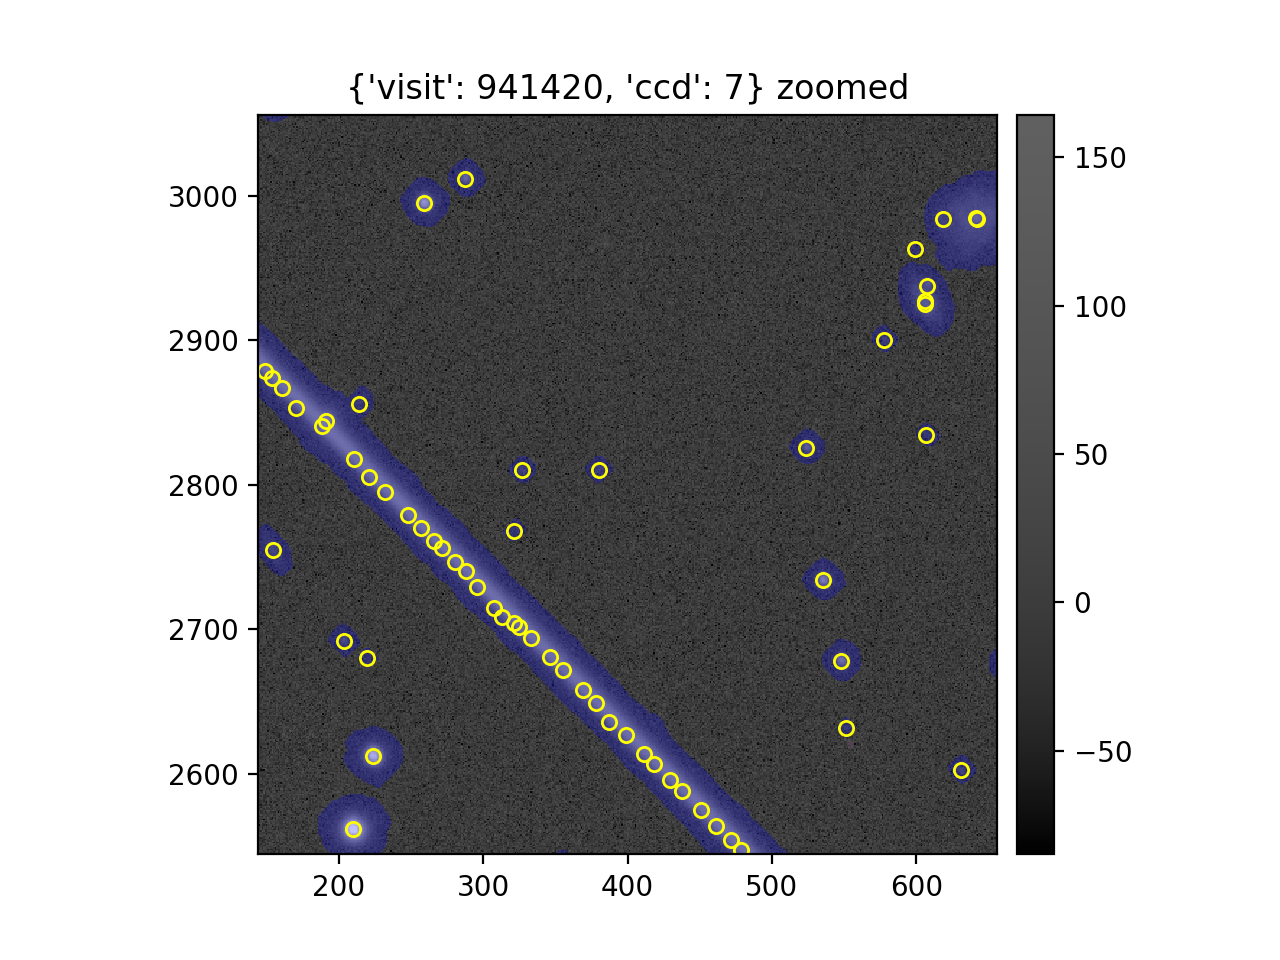

In [6]:
disp1 = afwDisplay.Display(1)
disp1.scale("asinh", "zscale", Q=8)
disp1.mtv(calexp, title=str(dataId) + ' zoomed')
disp1.zoom(8)
disp1.pan(400, 2800)
plt.plot(src['slot_Centroid_x'], src['slot_Centroid_y'], marker='o',
         mfc='None', ls='None', ms=psfRadius*2.355, color='yellow')

## Starlink 1102

<IPython.core.display.Javascript object>


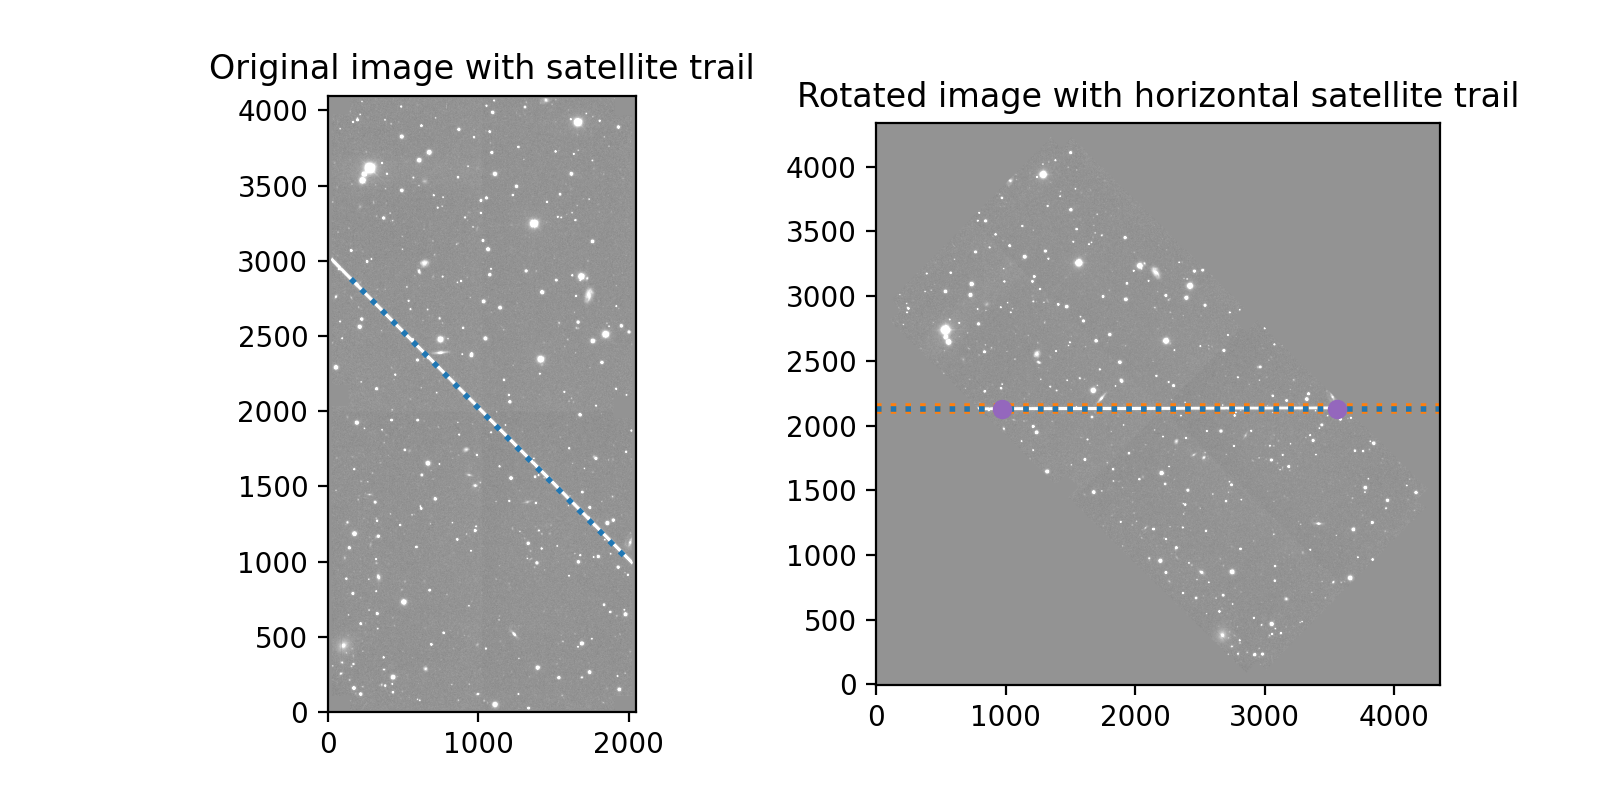

<IPython.core.display.Javascript object>


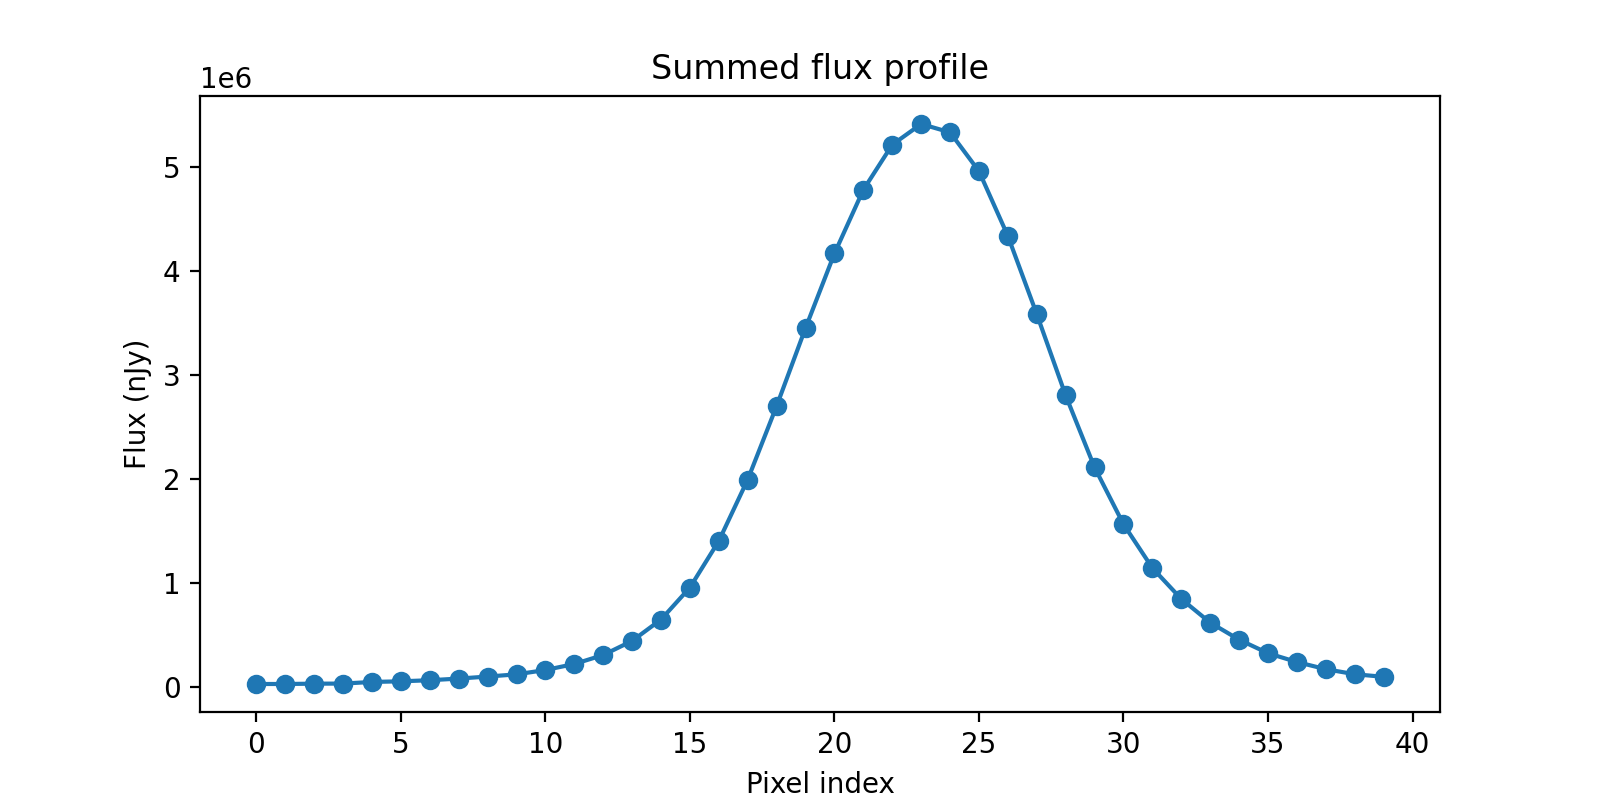

<IPython.core.display.Javascript object>


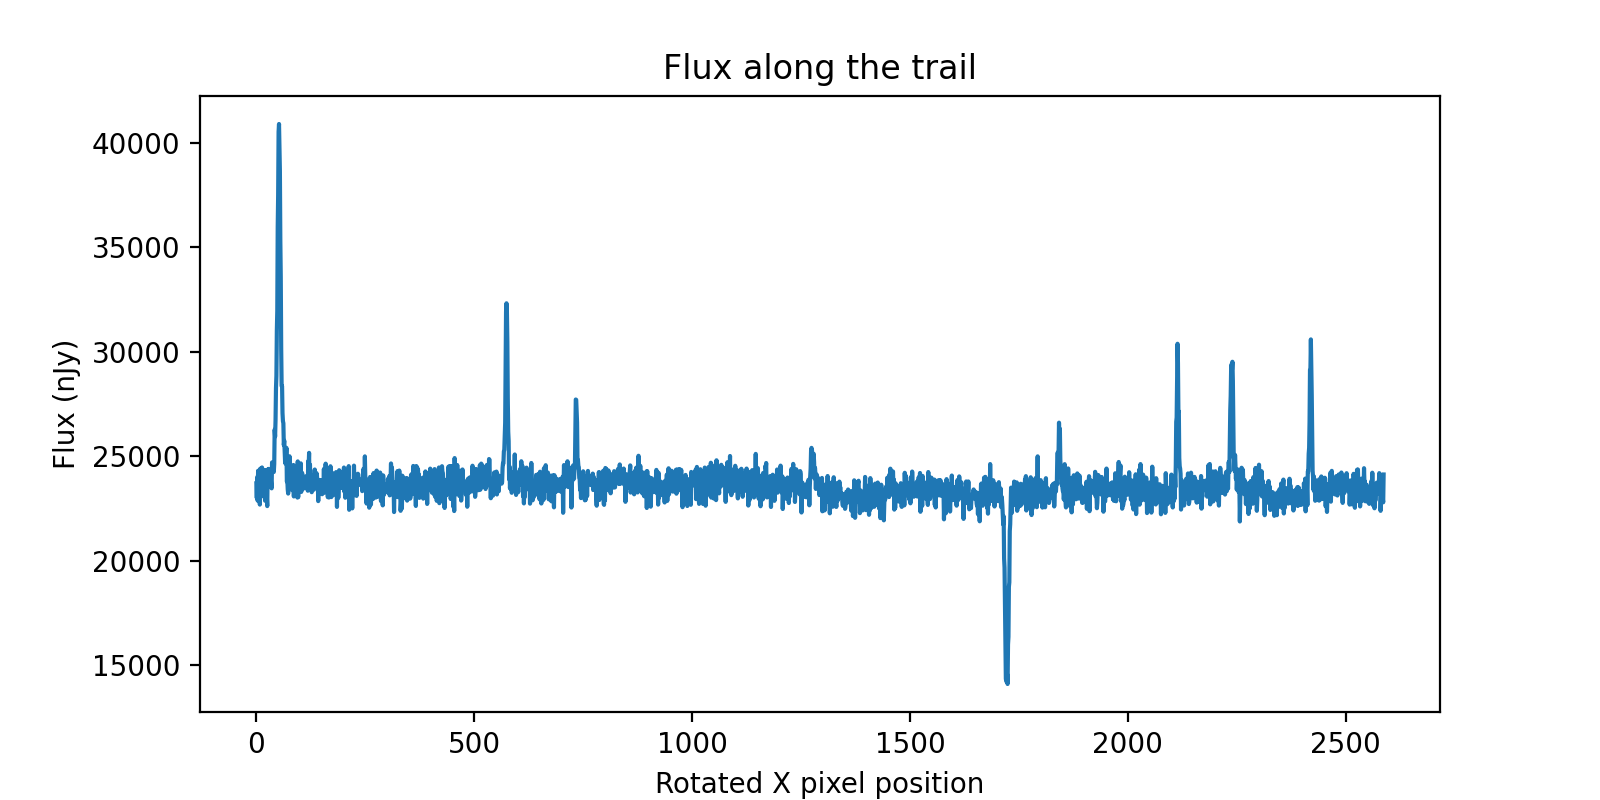

In [7]:
dataId = {'visit': 941420, 'ccd': 7}
trailPoint1 = [153.2, 2879.2]
trailPoint2 = [1970.7, 1036.3]
results1102 = slk.starlinkAnalyze(repo, dataId, trailPoint1, trailPoint2)

## Starlink 1073

<IPython.core.display.Javascript object>


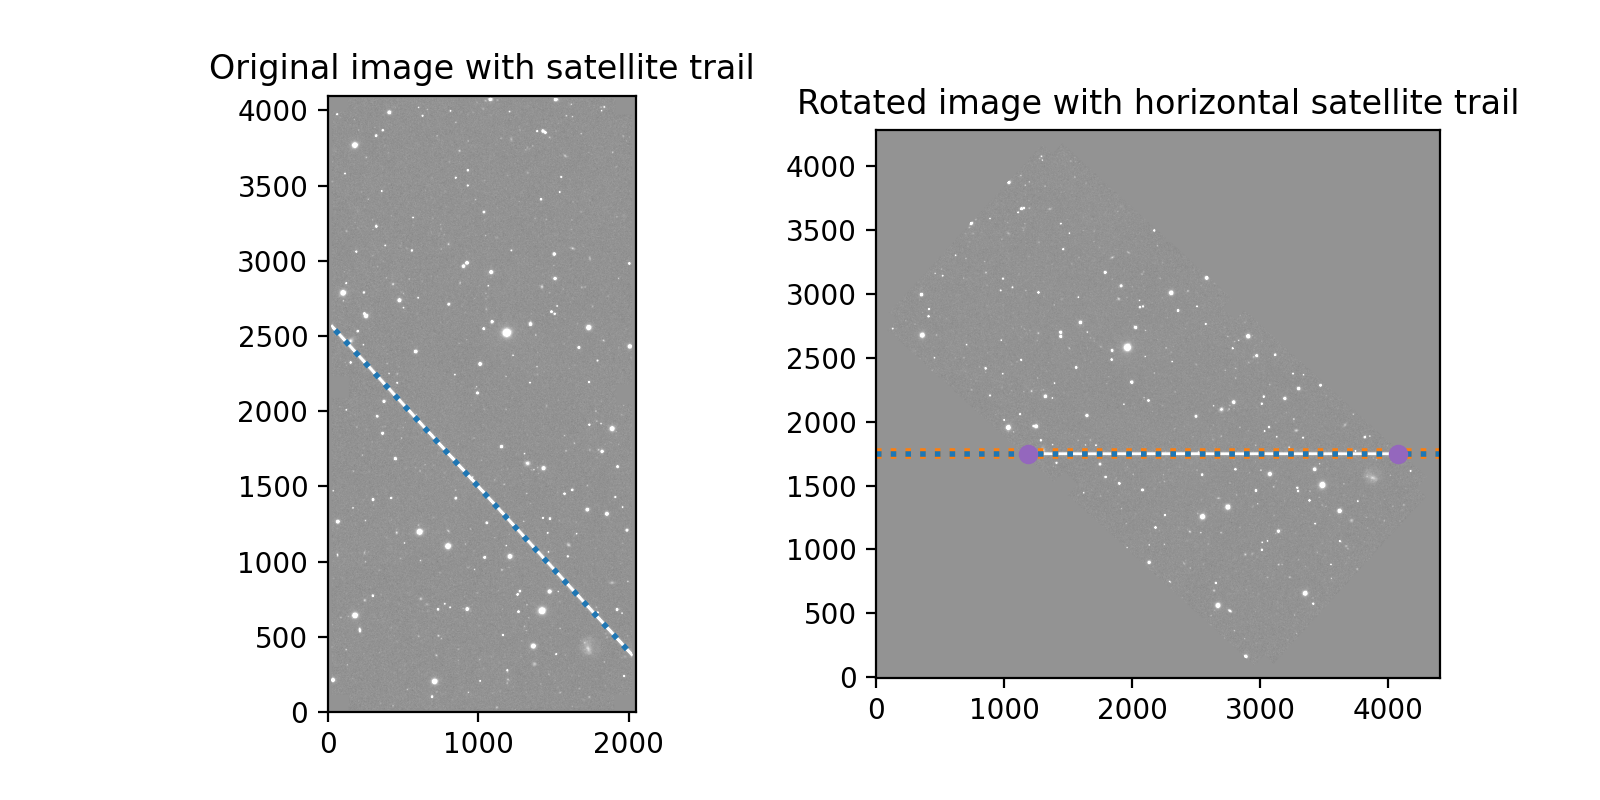

<IPython.core.display.Javascript object>


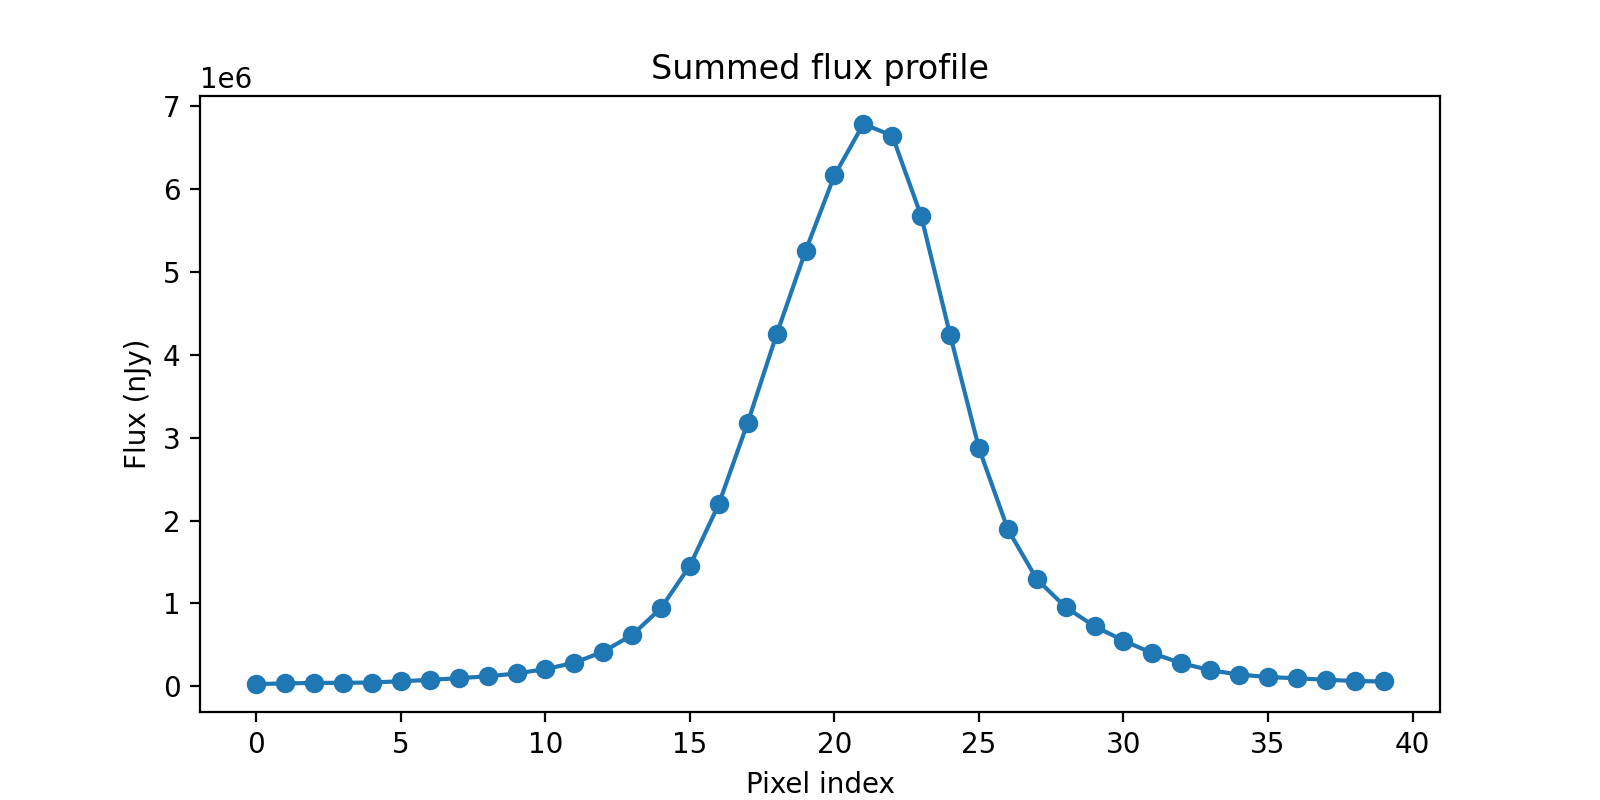

<IPython.core.display.Javascript object>


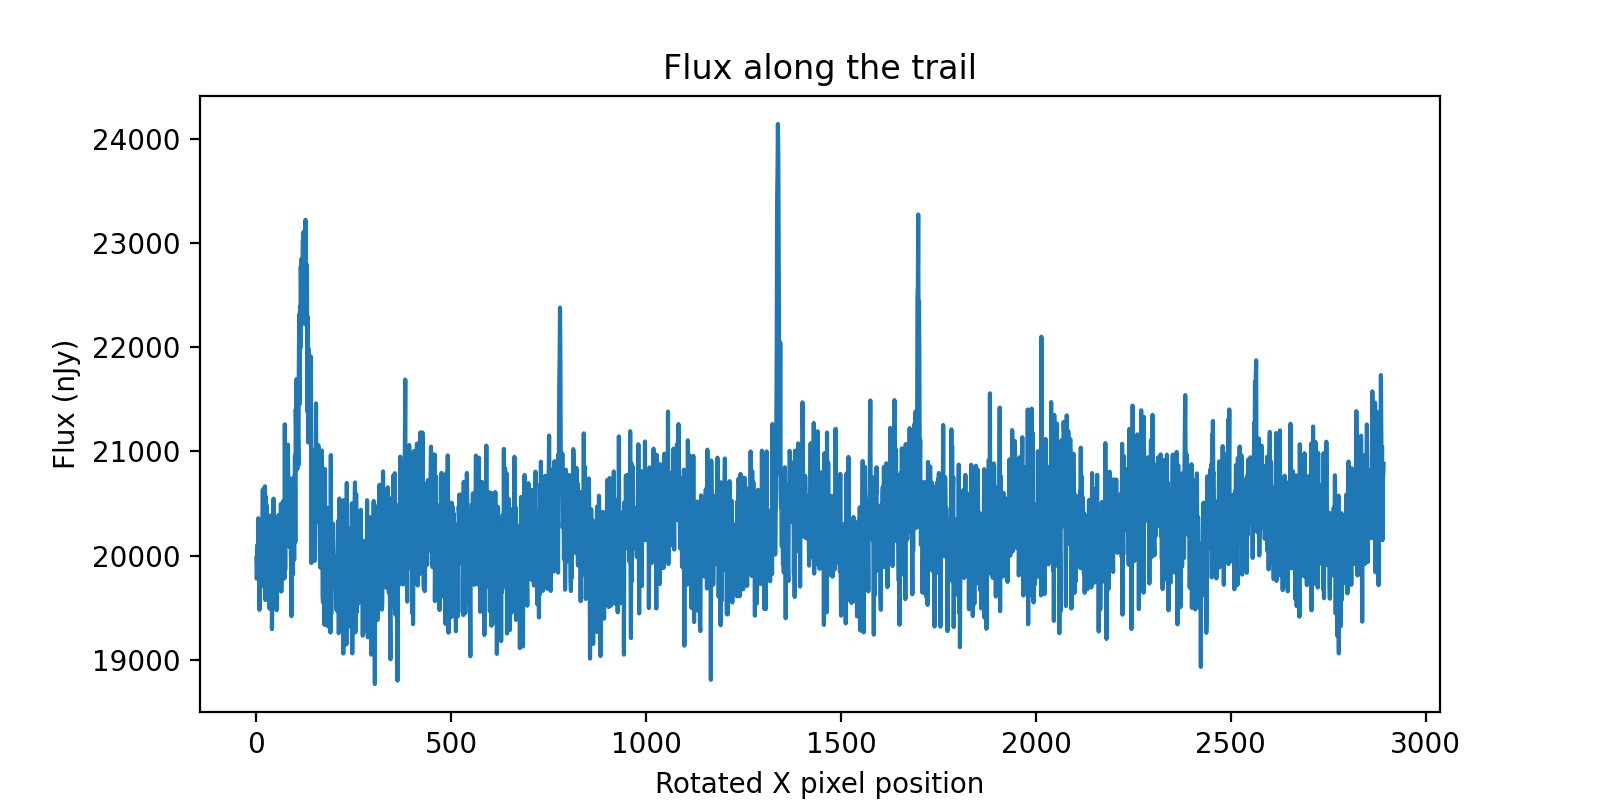

In [8]:
dataId = {'visit': 941422, 'ccd': 33}
trailPoint1 = [48.3, 2539.5]
trailPoint2 = [1999.7, 403.5]
results1073 = slk.starlinkAnalyze(repo, dataId, trailPoint1, trailPoint2)

## Starlink 1130 (DarkSat) and 1112

<IPython.core.display.Javascript object>


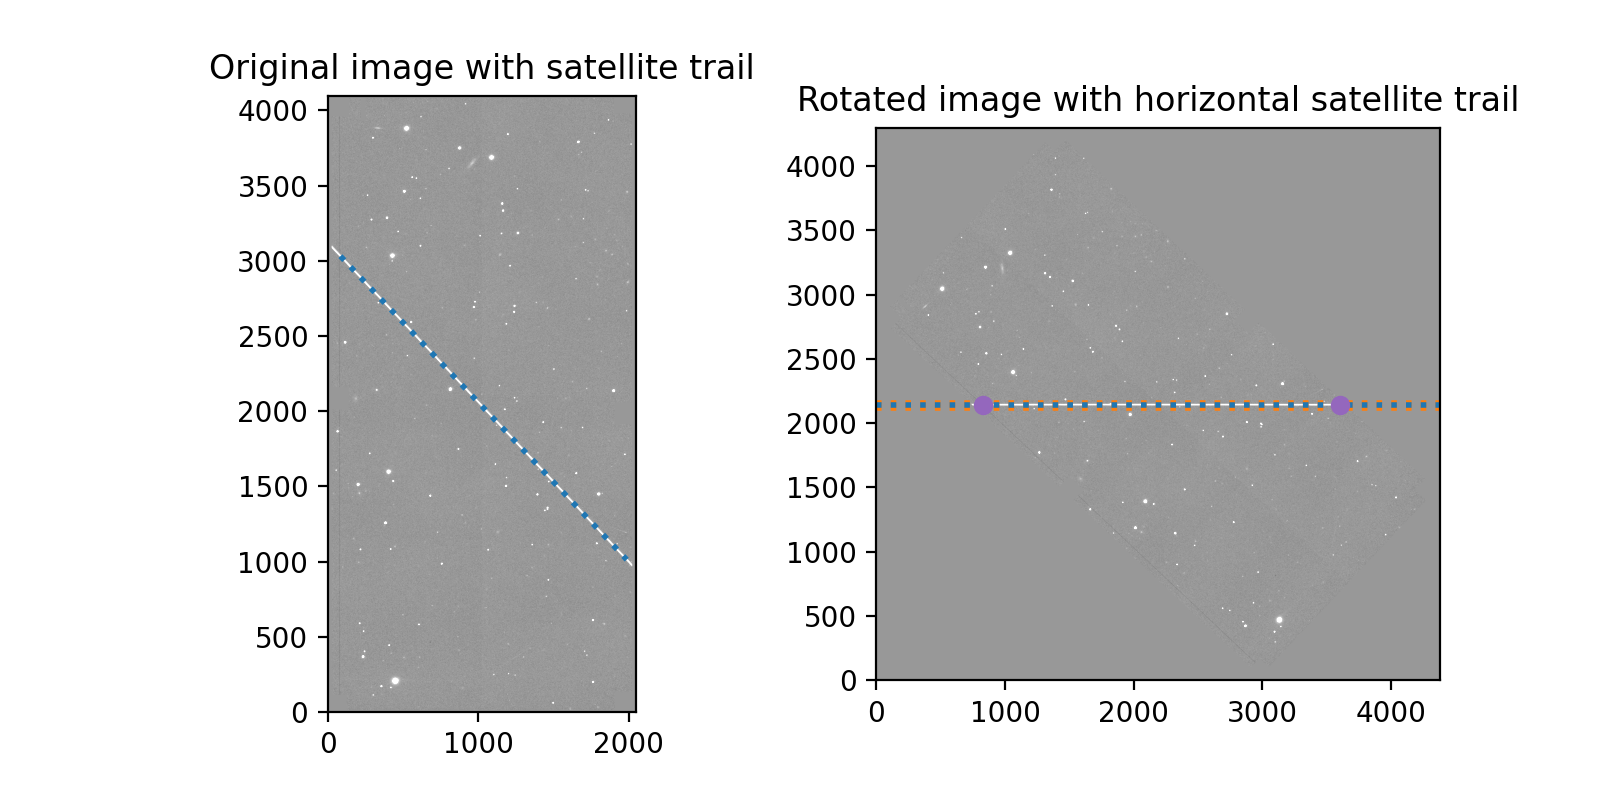

<IPython.core.display.Javascript object>


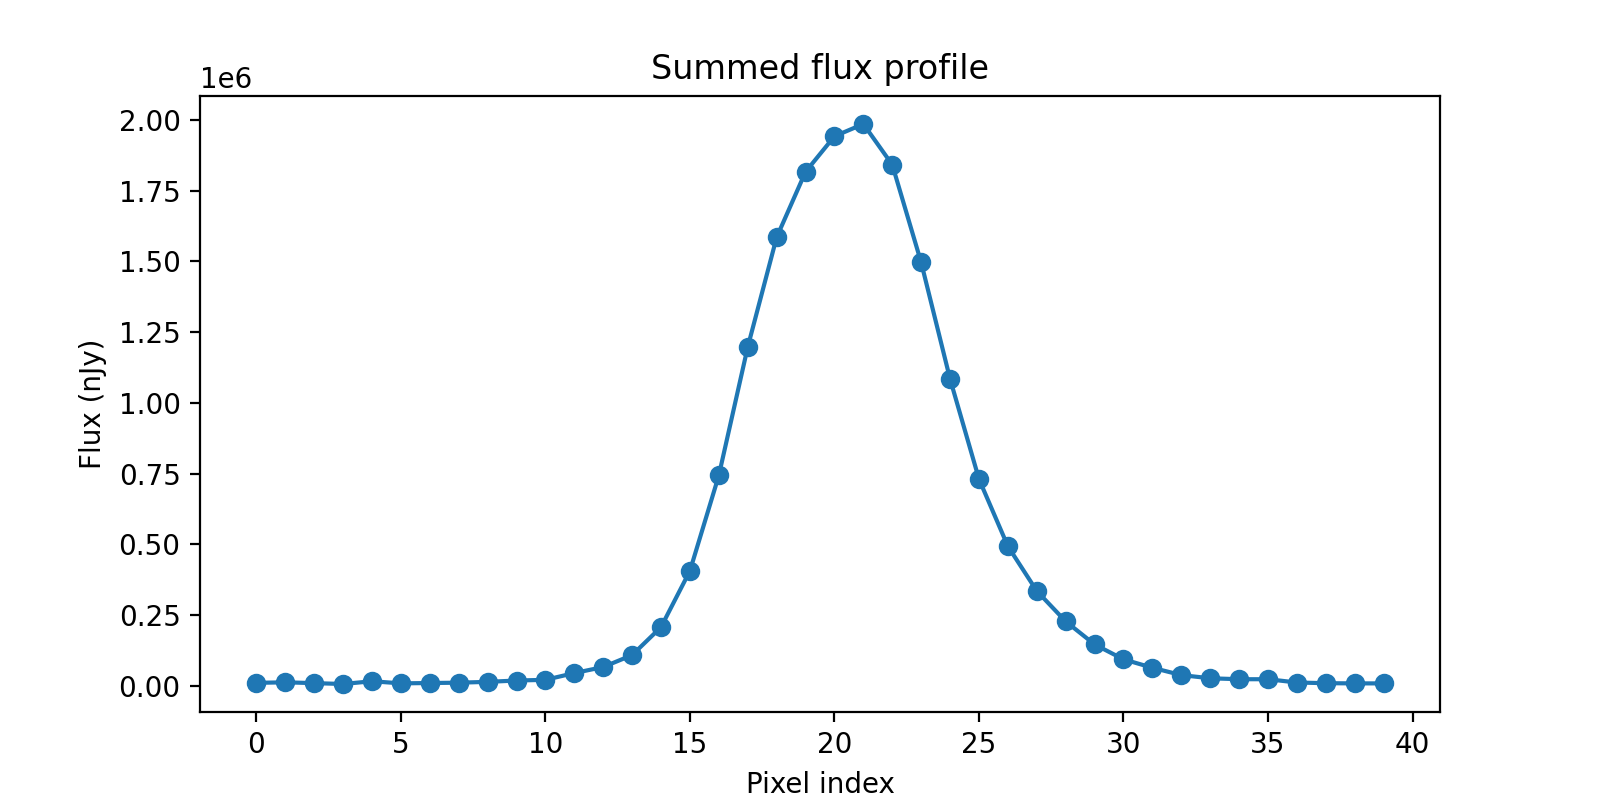

<IPython.core.display.Javascript object>


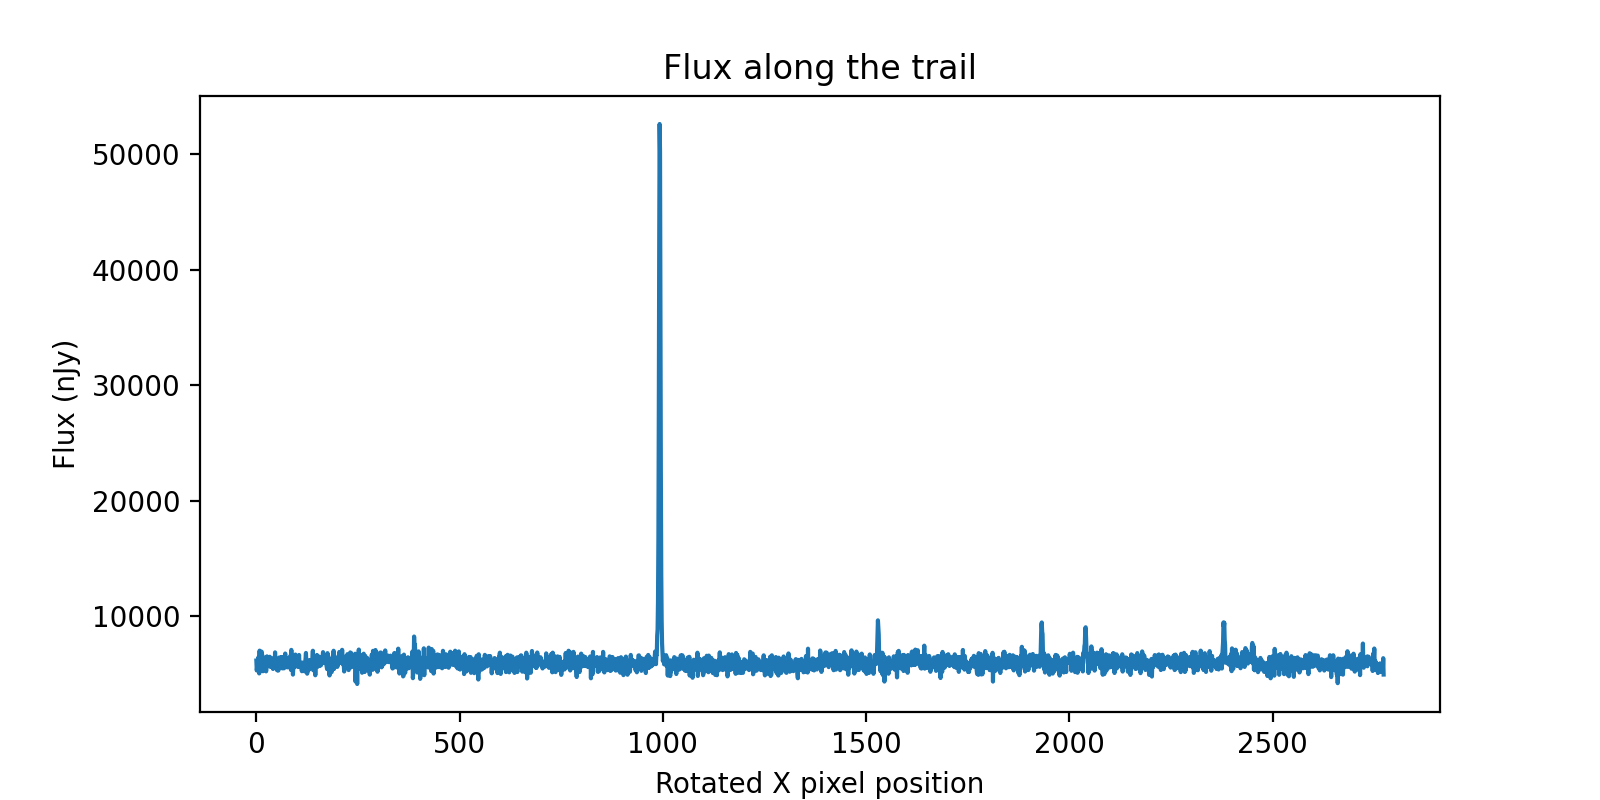

<IPython.core.display.Javascript object>


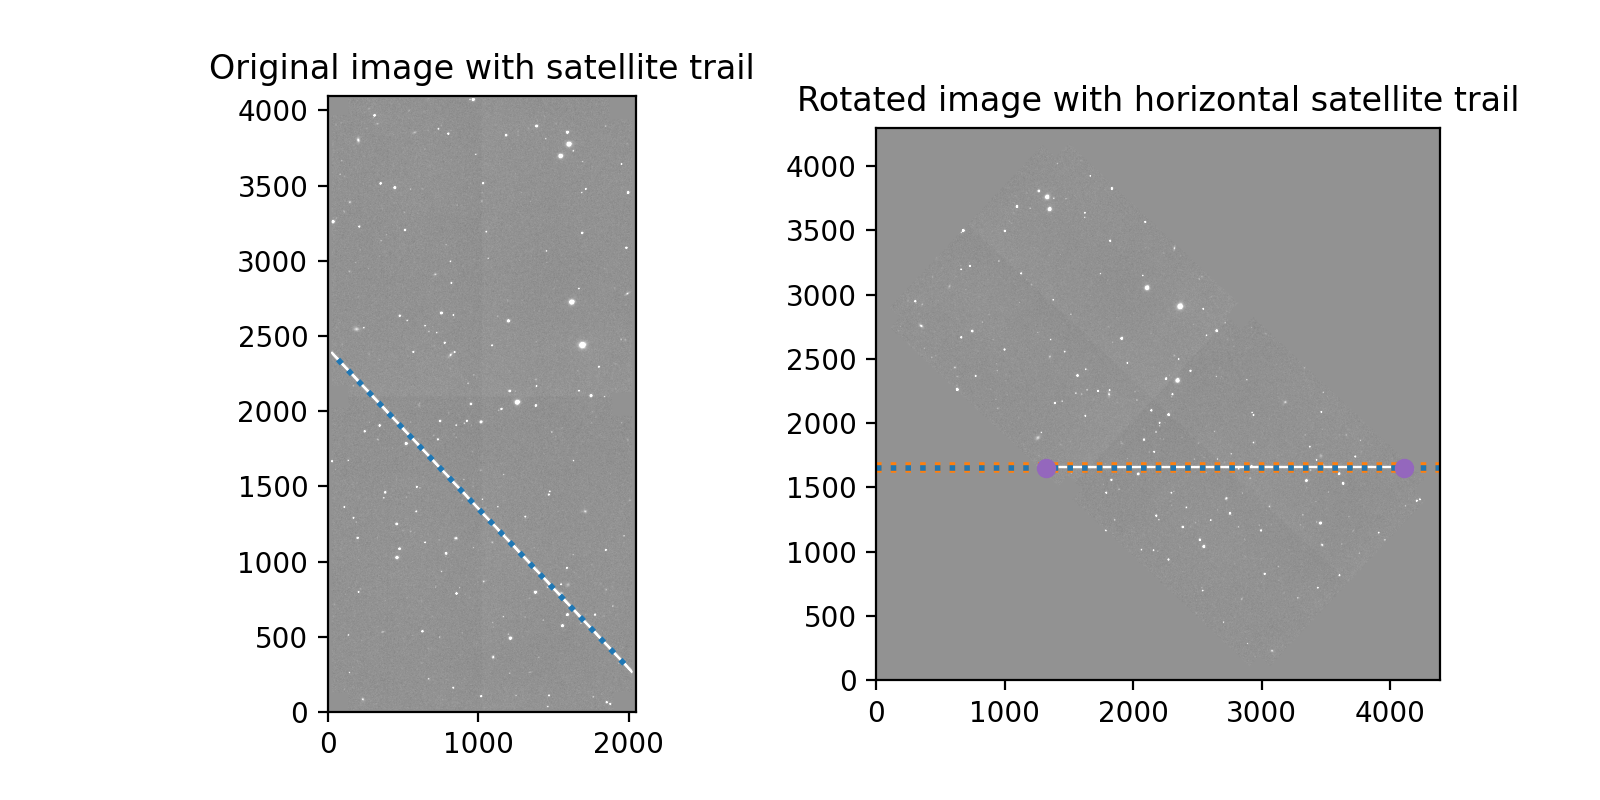

<IPython.core.display.Javascript object>


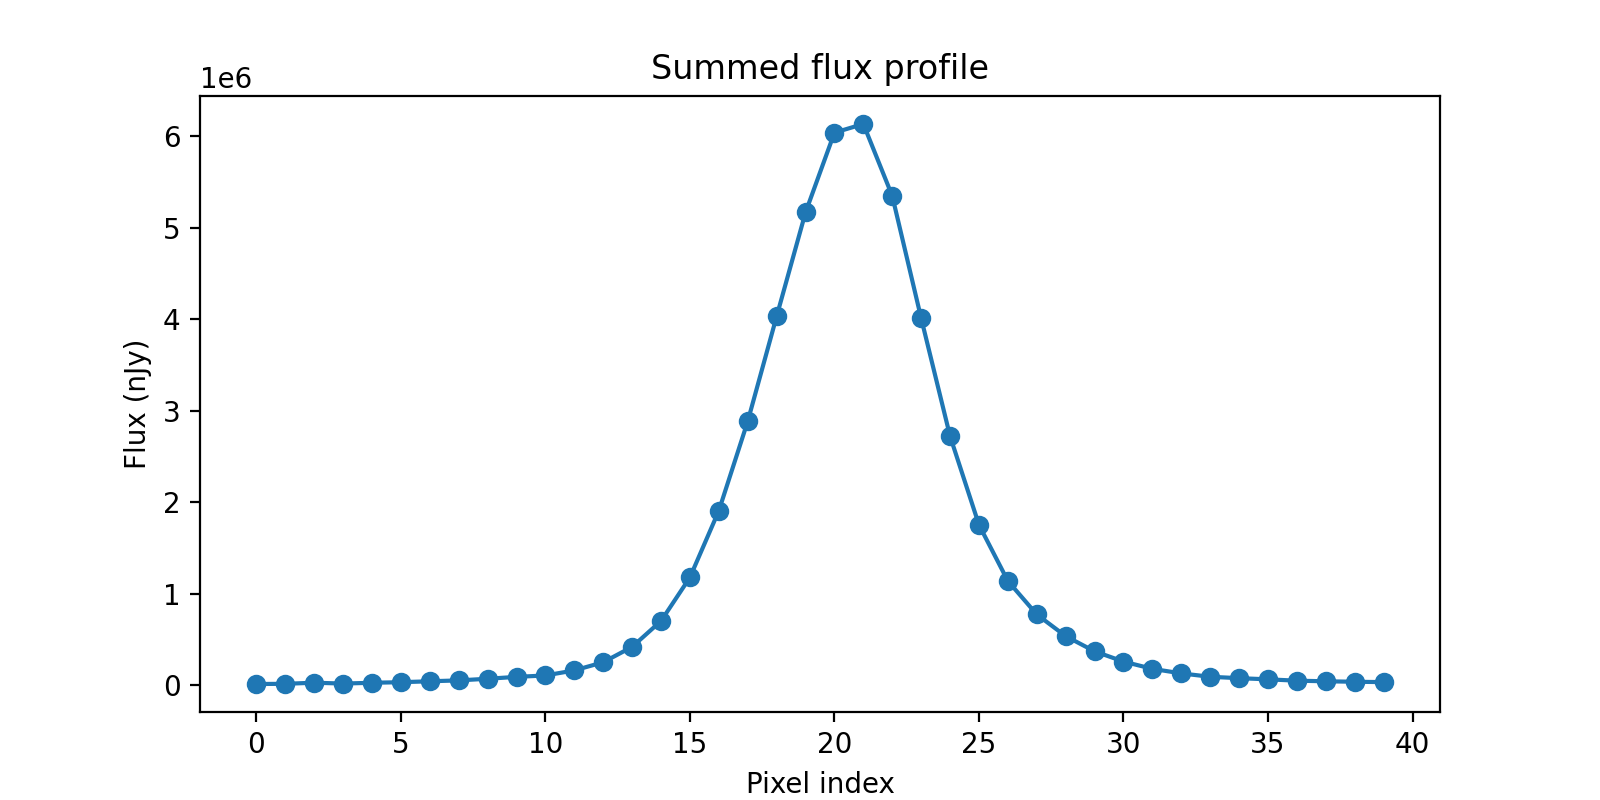

<IPython.core.display.Javascript object>


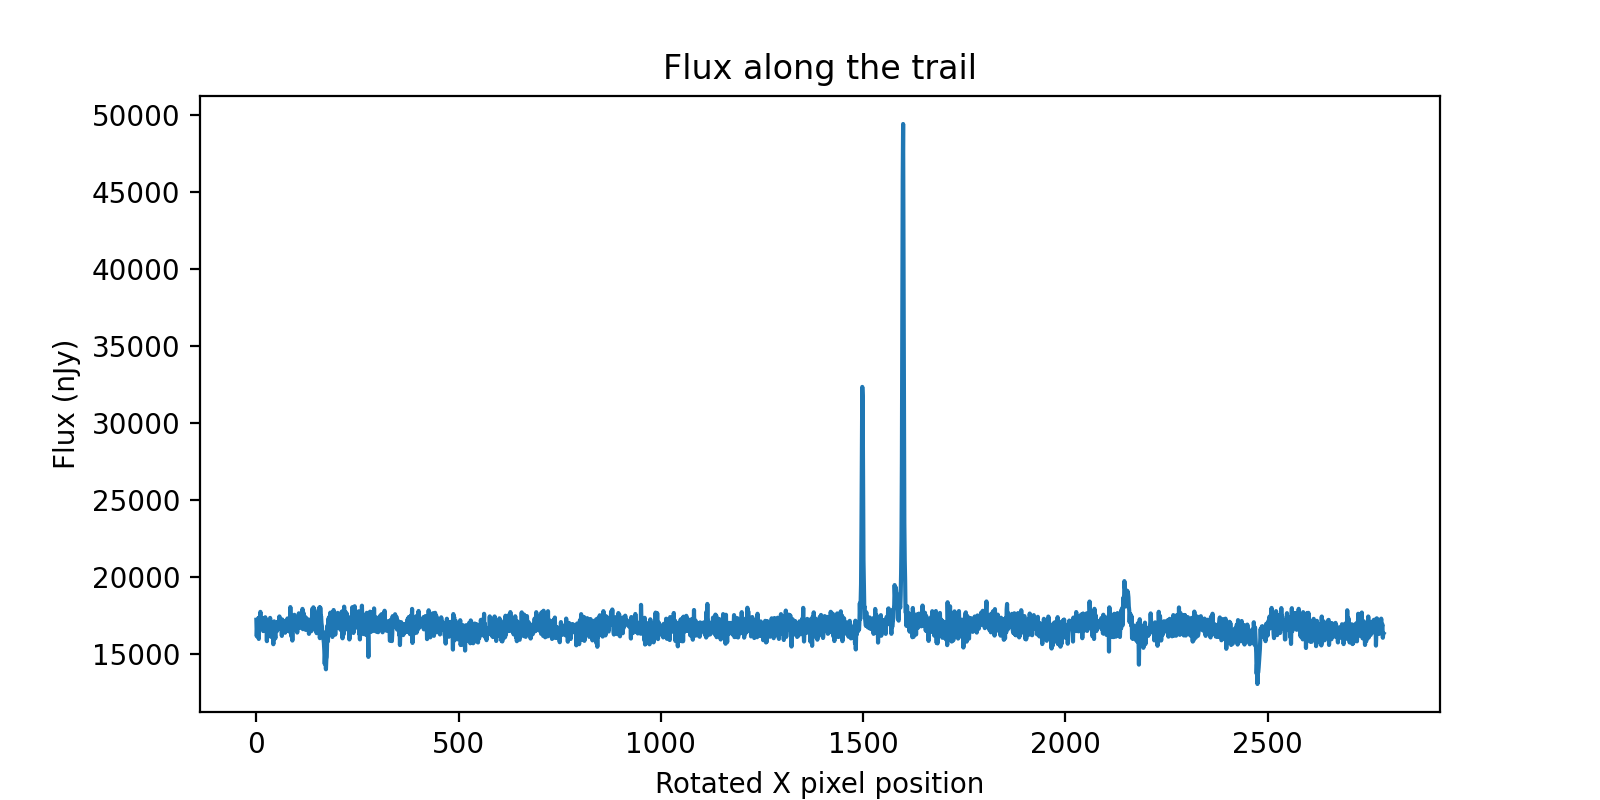

In [9]:
dataId1 = {'visit': 941424, 'ccd': 34}
dataId2 = {'visit': 941424, 'ccd': 37}

trail1Point1 = [83.5, 3030.5]
trail1Point2 = [1986.9, 1012.5]

trail2Point1 = [67.3, 2343.2]
trail2Point2 = [1978.1, 312.0]

results1130 = slk.starlinkAnalyze(repo, dataId1, trail1Point1, trail1Point2)

results1112 = slk.starlinkAnalyze(repo, dataId2, trail2Point1, trail2Point2)

## Starlink 1084

<IPython.core.display.Javascript object>


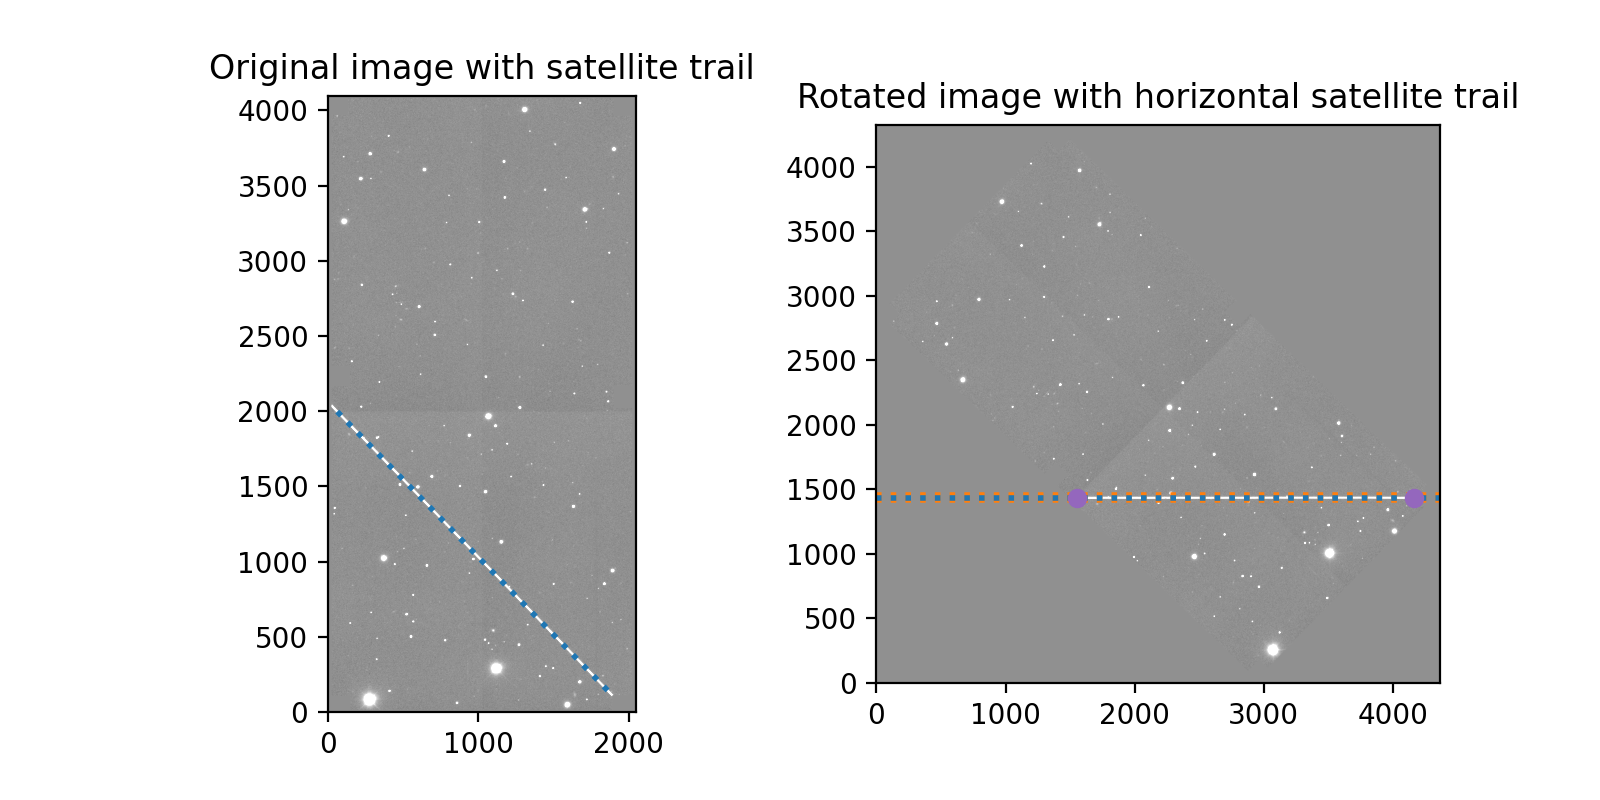

<IPython.core.display.Javascript object>


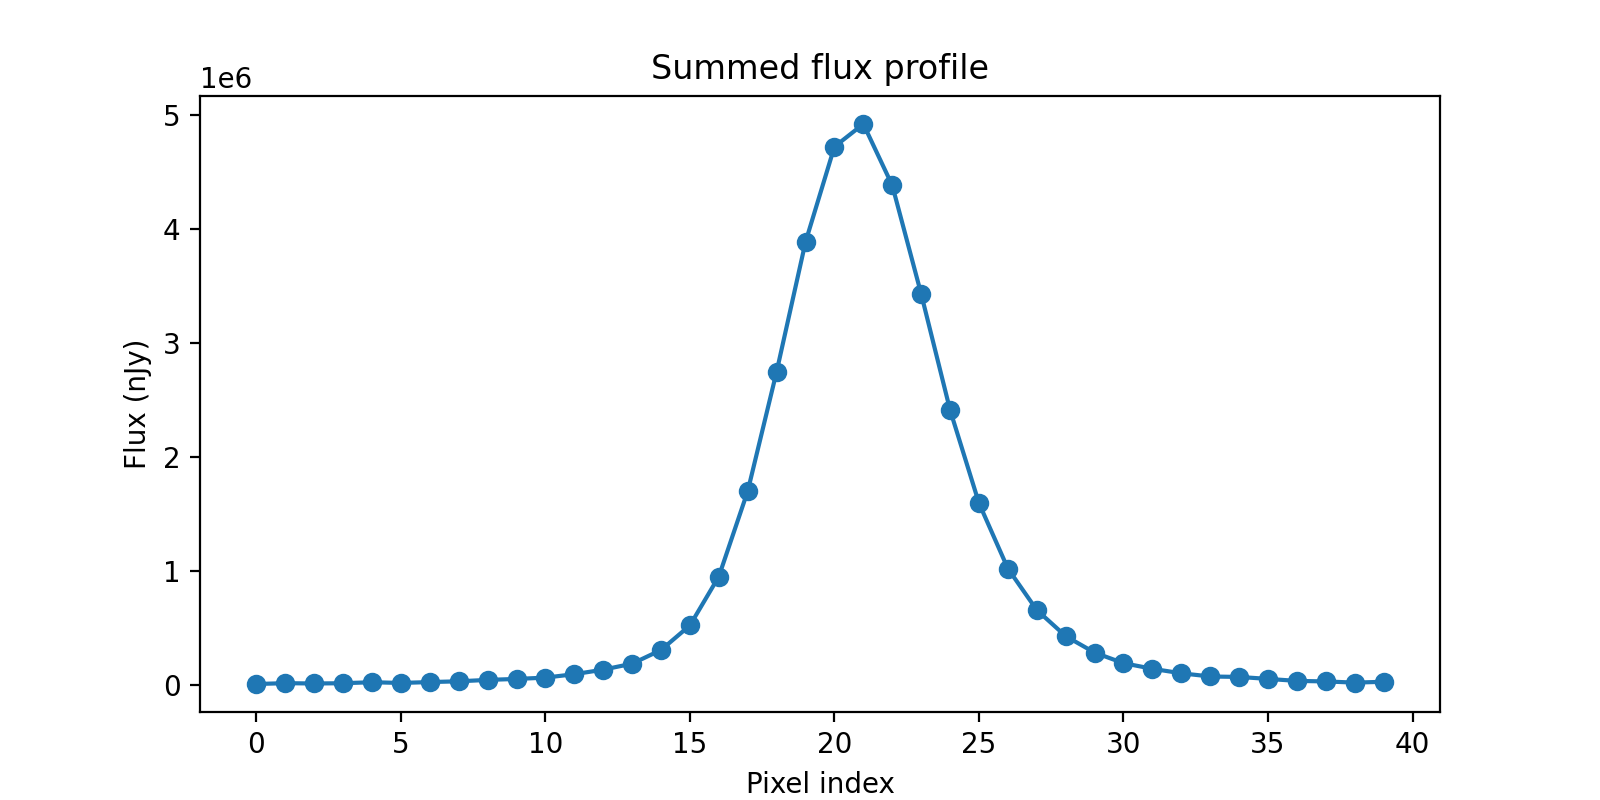

<IPython.core.display.Javascript object>


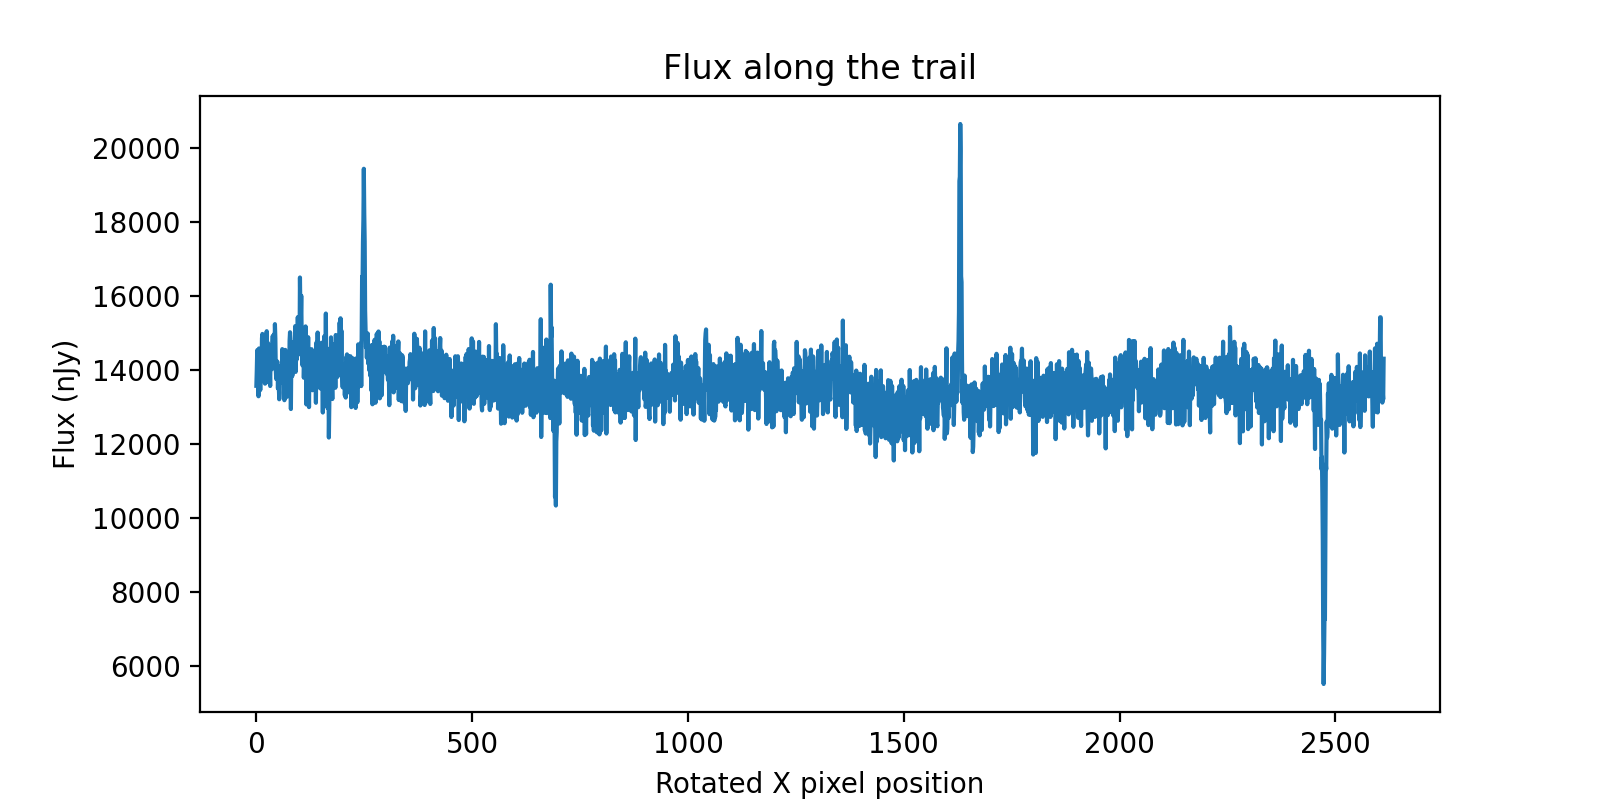

In [10]:
dataId = {'visit': 941426, 'ccd': 16}
trailPoint1 = [62.2, 1996.8]
trailPoint2 = [1881.6, 120.2]
results1084 = slk.starlinkAnalyze(repo, dataId, trailPoint1, trailPoint2)

In [11]:
frame = {'Satellite 1102': results1102, 'Satellite 1073': results1073,
         'Satellite 1130': results1130, 'Satellite 1112': results1112,
         'Satellite 1084': results1084}
resultsDf = pd.DataFrame(frame)

In [12]:
resultsDf

Satellite 1102  \
Visit                                         941420   
CCD                                                7   
Date and time (UTC)       2020-03-06 00:05:52.410235   
Exposure time                                120.0 s   
Boresight Az                              312.32 deg   
Boresight Alt                              77.25 deg   
Sun Az                                    255.95 deg   
Sun Alt                                   -12.41 deg   
Phase angle                                56.19 deg   
Airmass                                         1.03   
Image PSF radius                         0.57 arcsec   
Image PSF FWHM                           1.35 arcsec   
Background (mag)                   19.02 1 / arcsec2   
Summed trail flux                     61140368.0 nJy   
Trail FWHM                               2.43 arcsec   
Trail length                           679.68 arcsec   
Raw trail flux                37018.49 nJy / arcsec2   
Raw trail (mag)                    19.98 1 / arcsec2   
Corrected trail (mag)              14.78 1 / arcsec2   
Angular speed                           0.77 deg / s   
Stationary magnitude                            5.21   
Corrected stationary mag                        5.15   
Derived satellite size                        3.84 m   
Distance to satellite                      565.14 km   

                                      Satellite 1073  \
Visit                                         941422   
CCD                                               33   
Date and time (UTC)       2020-03-06 00:15:44.321460   
Exposure time                                120.0 s   
Boresight Az                              310.12 deg   
Boresight Alt                              60.07 deg   
Sun Az                                    254.59 deg   
Sun Alt                                   -14.47 deg   
Phase angle                                56.42 deg   
Airmass                                         1.15   
Image PSF radius                         0.57 arcsec   
Image PSF FWHM                           1.35 arcsec   
Background (mag)                   19.24 1 / arcsec2   
Summed trail flux                     58717708.0 nJy   
Trail FWHM                               2.04 arcsec   
Trail length                           760.91 arcsec   
Raw trail flux                37790.67 nJy / arcsec2   
Raw trail (mag)                    19.96 1 / arcsec2   
Corrected trail (mag)              14.76 1 / arcsec2   
Angular speed                            0.7 deg / s   
Stationary magnitude                            5.49   
Corrected stationary mag                        5.18   
Derived satellite size                        2.34 m   
Distance to satellite                       624.6 km   

                                      Satellite 1130  \
Visit                                         941424   
CCD                                               34   
Date and time (UTC)       2020-03-06 00:30:46.715972   
Exposure time                                120.0 s   
Boresight Az                              307.91 deg   
Boresight Alt                               40.1 deg   
Sun Az                                    252.43 deg   
Sun Alt                                   -17.59 deg   
Phase angle                                 60.1 deg   
Airmass                                         1.55   
Image PSF radius                         0.51 arcsec   
Image PSF FWHM                            1.2 arcsec   
Background (mag)                   18.94 1 / arcsec2   
Summed trail flux                     16886562.0 nJy   
Trail FWHM                               2.12 arcsec   
Trail length                           731.14 arcsec   
Raw trail flux                10890.08 nJy / arcsec2   
Raw trail (mag)                    21.31 1 / arcsec2   
Corrected trail (mag)              16.11 1 / arcsec2   
Angular speed                           0.54 deg / s   
Stationary magnitude                            7.08   
Corr

In [13]:
resultsDf.to_csv('resultsDf.csv')

## Create table and figure for paper

In [14]:
t = Table.read('resultsDf.csv')
t_pandas = t.to_pandas()
t2 = t_pandas.transpose()
t2.columns = t2.iloc[0]
t2.drop(['col0'], inplace=True)
t2

col0             Visit CCD         Date and time (UTC) Exposure time  \
Satellite 1102  941420   7  2020-03-06 00:05:52.410235       120.0 s   
Satellite 1073  941422  33  2020-03-06 00:15:44.321460       120.0 s   
Satellite 1130  941424  34  2020-03-06 00:30:46.715972       120.0 s   
Satellite 1112  941424  37  2020-03-06 00:30:46.715972       120.0 s   
Satellite 1084  941426  16  2020-03-06 00:35:27.310281       120.0 s   

col0           Boresight Az Boresight Alt      Sun Az     Sun Alt Phase angle  \
Satellite 1102   312.32 deg     77.25 deg  255.95 deg  -12.41 deg   56.19 deg   
Satellite 1073   310.12 deg     60.07 deg  254.59 deg  -14.47 deg   56.42 deg   
Satellite 1130   307.91 deg      40.1 deg  252.43 deg  -17.59 deg    60.1 deg   
Satellite 1112   307.91 deg      40.1 deg  252.43 deg  -17.59 deg    60.1 deg   
Satellite 1084   307.29 deg     35.68 deg  251.75 deg  -18.55 deg   61.23 deg   

col0           Airmass  ...   Trail FWHM   Trail length  \
Satellite 1102    1.03  ...  2.43 arcsec  679.68 arcsec   
Satellite 1073    1.15  ...  2.04 arcsec  760.91 arcsec   
Satellite 1130    1.55  ...  2.12 arcsec  731.14 arcsec   
Satellite 1112    1.55  ...  1.87 arcsec  733.34 arcsec   
Satellite 1084    1.71  ...  1.82 arcsec  688.24 arcsec   

col0                    Raw trail flux    Raw trail (mag)  \
Satellite 1102  37018.49 nJy / arcsec2  19.98 1 / arcsec2   
Satellite 1073  37790.67 nJy / arcsec2  19.96 1 / arcsec2   
Satellite 1130  10890.08 nJy / arcsec2  21.31 1 / arcsec2   
Satellite 1112  34276.02 nJy / arcsec2  20.06 1 / arcsec2   
Satellite 1084  28276.94 nJy / arcsec2  20.27 1 / arcsec2   

col0           Corrected trail (mag) Angular speed Stationary magnitude  \
Satellite 1102     14.78 1 / arcsec2  0.77 deg / s                 5.21   
Satellite 1073     14.76 1 / arcsec2   0.7 deg / s                 5.49   
Satellite 1130     16.11 1 / arcsec2  0.54 deg / s                 7.08   
Satellite 1112     14.86 1 / arcsec2  0.54 deg / s                 5.97   
Satellite 1084     15.07 1 / arcsec2   0.5 deg / s                 6.29   

col0           Corrected stationary mag Derived satellite size  \
Satellite 1102                     5.15                 3.84 m   
Satellite 1073                     5.18                 2.34 m   
Satellite 1130                     6.13                 5.58 m   
Satellite 1112                     5.02                 4.02 m   
Satellite 1084                     5.13                 3.47 m   

col0           Distance to satellite  
Satellite 1102             565.14 km  
Satellite 1073              624.6 km  
Satellite 1130             809.61 km  
Satellite 1112             809.61 km  
Satellite 1084             877.77 km  

[5 rows x 24 columns]

In [15]:
t2_astropy = Table.from_pandas(t2)
t2_astropy

<Table length=5>
Visit  CCD  ... Derived satellite size Distance to satellite
 str6  str2 ...          str6                   str9        
------ ---- ... ---------------------- ---------------------
941420    7 ...                 3.84 m             565.14 km
941422   33 ...                 2.34 m              624.6 km
941424   34 ...                 5.58 m             809.61 km
941424   37 ...                 4.02 m             809.61 km
941426   16 ...                 3.47 m             877.77 km

In [16]:
#t2_astropy.write('delve-starlink2.tex', format='latex')  # a good start, but more tweaking will be required

<IPython.core.display.Javascript object>


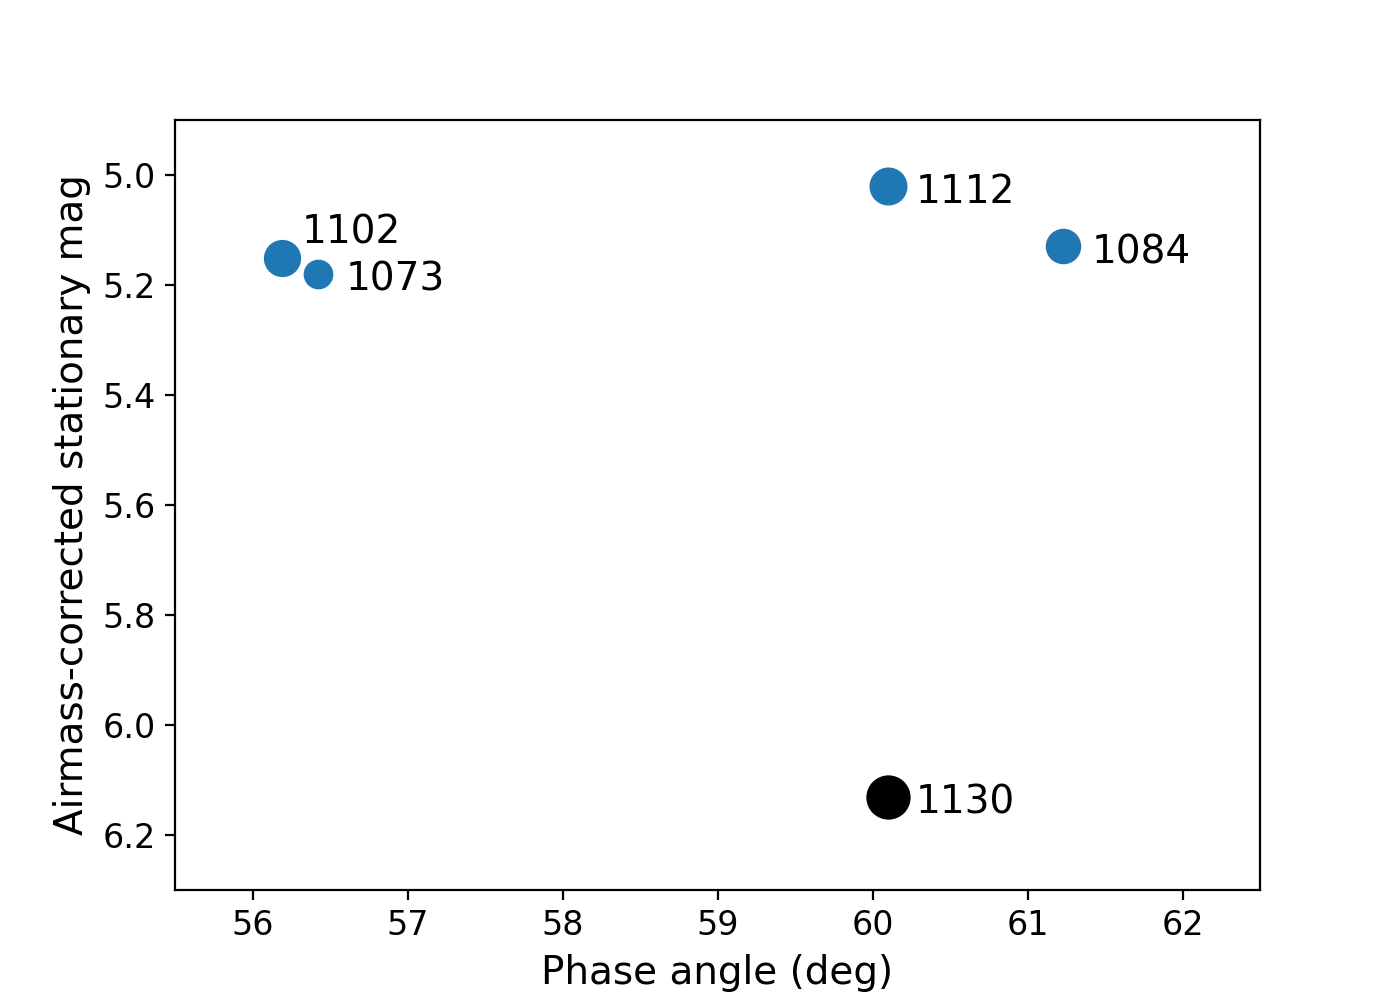

In [17]:
plt.figure(figsize=(7, 5))
for sat in ['Satellite 1102', 'Satellite 1073', 'Satellite 1130', 'Satellite 1112', 'Satellite 1084']:
    mag = resultsDf.T['Corrected stationary mag'].loc[sat]
    angle = resultsDf.T['Phase angle'].loc[sat].value
    if sat[-4::] == '1130':
        color = 'k'
    else:
        color = 'C0'
    plt.scatter(angle, mag, label=sat[-4::], s=resultsDf.T['Derived satellite size'].loc[sat].value*40, color=color)
    if sat[-4::] == '1102':
        xytext = (25, 5)
    else:
        xytext = (28, -6)
    plt.annotate(sat[-4::], # this is the text
                 (angle, mag), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=xytext, # distance from text to points (x,y)
                 ha='center',
                 size=14)
#plt.legend()
plt.gca().set_xlim([55.5, 62.5])
plt.gca().set_ylim([6.3, 4.9])
#plt.gca().invert_yaxis()
plt.xlabel('Phase angle (deg)', size=14)
plt.ylabel('Airmass-corrected stationary mag', size=14)
plt.gca().tick_params(labelsize=12)
plt.savefig('phase-angle-vs-mag.eps')

### Another figure for the paper, for 1102 only

In [18]:
dataId = {'visit': 941420, 'ccd': 7}
trailPoint1 = [153.2, 2879.2]
trailPoint2 = [1970.7, 1036.3]
trailWidth=20
njyImage, _, _, _, _, _, _ = slk.loadData(repo, dataId)
rotatedInfo = slk.makeTrailHorizontal(njyImage.image.array, trailPoint1, trailPoint2, trailWidth)
sliced = rotatedInfo[3]
means, widths = slk.fit_columns(sliced, center=trailWidth)
avg_fwhm = 2.355 * np.mean(widths)
calexpArray = njyImage.getImage().getArray()
calexpNorm = ImageNormalize(calexpArray, interval=ZScaleInterval(), stretch=SqrtStretch())
miniCalexpArray = calexpArray[2590:2630, 200:250]

In [19]:
calexp = butler.get('calexp', dataId=dataId)
#psfArray = calexp.getPsf().computeImage().getArray()
#plt.figure()
#plt.plot(psfArray[int(len(psfArray)/2)])
#psfRadius = calexp.getPsf().computeShape().getDeterminantRadius()
#psfRadius = calexp.getPsf().computeShape().getTraceRadius()
psfRadius = calexp.getPsf().computeShape().getIxx()
psfArray = calexp.getPsf().computeKernelImage().getArray()
#dir(calexp.getPsf().computeShape())

print(calexp.getPsf().computeShape().getTraceRadius())
print(calexp.getPsf().computeShape().getDeterminantRadius())
print(calexp.getPsf().computeShape().getIxx())
print(calexp.getPsf().computeShape().getIyy())

2.1784587844101355
2.1748135453331696
4.599743934536715
4.891621416210655


<IPython.core.display.Javascript object>


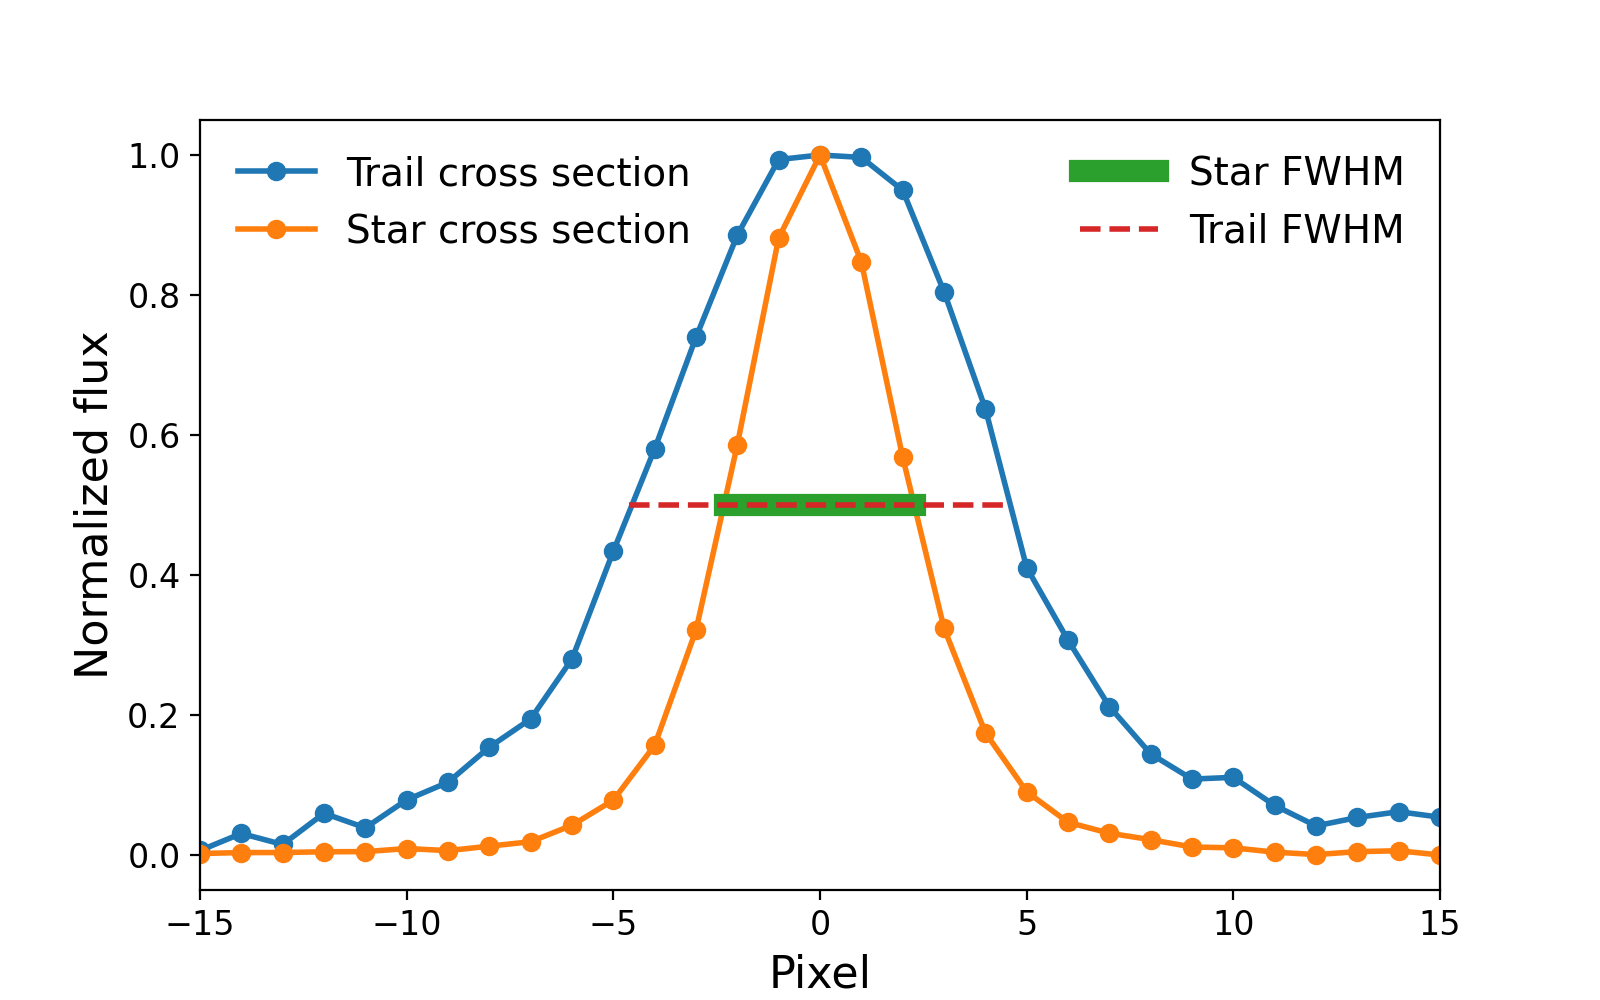

In [20]:
fig4 = plt.figure(figsize=(8, 5))
ax4 = fig4.subplots()

ax4Trail = sliced[..., int(len(sliced/2))]
ax4TrailProfile = (ax4Trail - np.min(ax4Trail))/(np.max(ax4Trail) - np.min(ax4Trail))
ax4.plot(np.arange(len(ax4TrailProfile)) - 20, ax4TrailProfile, marker='o', lw=2,
         label='Trail cross section')

psfProfile = psfArray[15]
psfProfileNorm = (psfProfile - np.min(psfProfile))/(np.max(psfProfile) - np.min(psfProfile))
ax4_xvals = np.arange(len(psfArray[15])) - 15
ax4.plot(ax4_xvals, psfProfileNorm, marker='o', lw=2,
         label='Star cross section')

ax4.plot([-psfRadius/2, psfRadius/2], [0.5, 0.5], label='Star FWHM', lw=8)#, alpha=0.7)
ax4.plot([-avg_fwhm/2, avg_fwhm/2], [0.5, 0.5], label='Trail FWHM', lw=2, ls='--')#, c='C0')

plt.legend(fontsize=14, frameon=False, ncol=2, columnspacing=10)
plt.xlabel('Pixel', size=16)
plt.ylabel('Normalized flux', size=16)
plt.gca().tick_params(labelsize=12)
plt.gca().set_xlim([-15, 15])
plt.savefig('brightness-profile-observed.eps')